In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

In [16]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [18]:
face_cascade = cv2.CascadeClassifier('./celbrity face/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./celbrity face/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

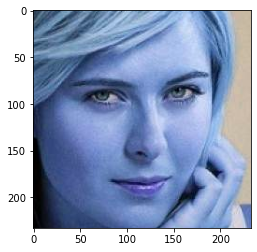

In [20]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [21]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


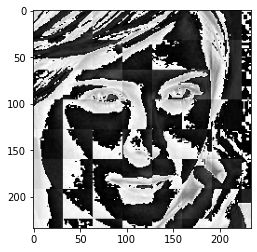

In [22]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')


In [23]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./datasets/cropped/"

In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
for entry in os.scandir(img_dirs):
    roi_color = get_cropped_image_if_2_eyes(entry.path)

In [ ]:
get_cropped_image_if_2_eyes('./images_dataset/lionel_messi\85054-messi12.jfif')

In [ ]:
cc





In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:
            pass
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./datasets/cropped/lionel_messi
Generating cropped images in folder:  ./datasets/cropped/maria_sharapova
Generating cropped images in folder:  ./datasets/cropped/roger_federer
Generating cropped images in folder:  ./datasets/cropped/serena_williams
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [ ]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        try:
            (get_cropped_image_if_2_eyes(entry.path))
        except:
            pass

In [ ]:
celebrity_file_names_dict

In [36]:
x,y=[],[]
for celeb,image in celebrity_file_names_dict.items():
    for images in image:
        img=cv2.imread(images)
        scalled_img=cv2.resize(img,(32, 32))
        img_har=w2d(img,'db1',5)
        scalled_har=cv2.resize(img_har,(32, 32))
        combined=np.vstack((scalled_img.reshape(32*32*3,1),scalled_har.reshape(32*32,1)))
        x.append(combined)
        y.append(class_dict[celeb])
    

In [27]:
class_dict={}
count=0
for celeb in celebrity_file_names_dict.keys():
    class_dict[celeb]=count
    count = count + 1

In [ ]:
count

In [29]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [35]:
len(x[0])

4096

In [34]:
x

[array([[100],
        [129],
        [140],
        ...,
        [237],
        [234],
        [232]], dtype=uint8),
 array([[ 90],
        [ 66],
        [ 67],
        ...,
        [ 36],
        [247],
        [ 23]], dtype=uint8),
 array([[42],
        [44],
        [51],
        ...,
        [ 4],
        [55],
        [ 5]], dtype=uint8),
 array([[ 63],
        [ 63],
        [ 67],
        ...,
        [  2],
        [194],
        [  4]], dtype=uint8),
 array([[ 56],
        [ 65],
        [ 68],
        ...,
        [231],
        [248],
        [ 15]], dtype=uint8),
 array([[29],
        [34],
        [33],
        ...,
        [ 3],
        [ 0],
        [ 0]], dtype=uint8),
 array([[126],
        [130],
        [125],
        ...,
        [247],
        [ 10],
        [232]], dtype=uint8),
 array([[  9],
        [ 16],
        [ 15],
        ...,
        [253],
        [140],
        [  1]], dtype=uint8),
 array([[ 11],
        [  6],
        [  7],
        ...,
        [2